**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2,3,4)) #tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)


↑ ones()為產生全為1的矩阵：

ones(N)=NxN、ones(M,N)=MxN(M個橫排、N個直排)、ones(M,N,P)=M個NxP(N個橫排、P個直排，共M次)

In [ ]:
x = tf.zeros(shape=(2,3,4)) #tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4), dtype=float32)


↑ 類似於上，zeros()為產生全為0的矩阵

**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3,3,2), mean=1., stddev=2.) #tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[[ 0.3935743   3.2108412 ]
  [ 2.9234996   4.1070175 ]
  [ 1.6832899   0.22584975]]

 [[ 0.3231598   0.04296333]
  [ 2.2614152   0.25149125]
  [-0.4643135  -0.9915893 ]]

 [[ 1.2167084   3.8897805 ]
  [ 2.3588505  -1.0935402 ]
  [-1.7997553  -2.1214826 ]]], shape=(3, 3, 2), dtype=float32)


↑ random.normal為高斯正態分佈中抽取隨機樣本：
mean=平均、stddev=標準差

In [ ]:
x = tf.random.uniform(shape=(3,2,4), minval=0., maxval=1.) #tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[[0.81398404 0.8779763  0.6488584  0.03327441]
  [0.3616084  0.55362344 0.26886296 0.20718491]]

 [[0.00159597 0.34896326 0.71654236 0.12340271]
  [0.05497503 0.0383389  0.7441828  0.65150654]]

 [[0.995509   0.38615513 0.4350518  0.14391744]
  [0.5192455  0.9024168  0.5131222  0.8364514 ]]], shape=(3, 2, 4), dtype=float32)


↑ random.uniform為最大最小範圍內隨機：
minval=最小值、maxval=最大值

**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2,3,4)) #np.ones(shape=(2,2))
x[0,0]=0.

x[1,1,3]=0.
x

array([[[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]]])

↑ 2個3x4的矩陣中：

x[0,0]=0.為將第1個(上方)3x4矩陣的第1橫排值全改0、

x[1,1,3]=0.為將第2個(下方)3x4矩陣的第2橫排第4個值改0

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.609444  ],
       [ 0.45376986],
       [-0.61330235]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

↑ 上方已將v設值為3x1的全為1矩陣，而此處將第1個值改為3

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

↑ 接續上面，新加入一組3x1的全1陣列，讓v值為(3+1,1+1,1+1)

而不斷執行此行的話會一直加總改變原v的值

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((3,3))+tf.ones((1,1)) #tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

a,b,c,d,e

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[1.4142134, 1.4142134, 1.4142134],
        [1.4142134, 1.4142134, 1.4142134],
        [1.4142134, 1.4142134, 1.4142135]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[5.414213 , 5.414213 , 5.414213 ],
        [5.414213 , 5.414213 , 5.414213 ],
        [5.414213 , 5.414213 , 5.4142137]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[129.94112, 129.94112, 129.94112],
        [129.94112, 129.94112, 129.94112],
        [129.94112, 129.94112, 129.94113]], dtype=float32)>)

↑ a為設3x3的全1矩陣、b為將a平方、c為將a開根號、

d為b+c、e為ab矩陣相乘後再乘d矩陣

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

negative_samples,  positive_samples

(array([[ 0.68127316,  3.90655274],
        [-0.05551552,  2.60447878],
        [ 2.26712982,  3.75517387],
        ...,
        [ 0.10663799,  2.65850446],
        [ 0.93350172,  3.66124726],
        [ 0.74230311,  3.59692044]]), array([[ 1.99584484,  0.02055041],
        [ 3.91186596,  1.29920092],
        [ 4.5972866 ,  1.61636841],
        ...,
        [ 3.29317613, -0.40920975],
        [ 2.74068572,  0.22836141],
        [ 4.83191164,  1.0274019 ]]))

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.68127316,  3.9065528 ],
       [-0.05551552,  2.6044788 ],
       [ 2.26713   ,  3.755174  ],
       ...,
       [ 3.2931762 , -0.40920976],
       [ 2.7406857 ,  0.22836141],
       [ 4.8319116 ,  1.0274019 ]], dtype=float32)

↑ vstack()為垂直照順序把數列堆疊

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**Plotting the two point classes**

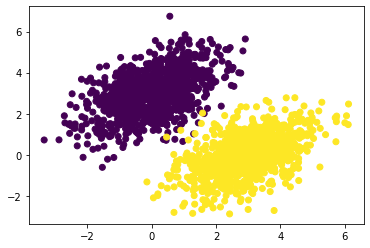

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

（⊙ｏ⊙）!!

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.16006029],
        [0.16305971]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.3381
Loss at step 1: 0.0897
Loss at step 2: 0.0826
Loss at step 3: 0.0773
Loss at step 4: 0.0727
Loss at step 5: 0.0685
Loss at step 6: 0.0647
Loss at step 7: 0.0612
Loss at step 8: 0.0580
Loss at step 9: 0.0551
Loss at step 10: 0.0525
Loss at step 11: 0.0501
Loss at step 12: 0.0480
Loss at step 13: 0.0460
Loss at step 14: 0.0442
Loss at step 15: 0.0426
Loss at step 16: 0.0411
Loss at step 17: 0.0398
Loss at step 18: 0.0385
Loss at step 19: 0.0374
Loss at step 20: 0.0364
Loss at step 21: 0.0355
Loss at step 22: 0.0347
Loss at step 23: 0.0339
Loss at step 24: 0.0332
Loss at step 25: 0.0326
Loss at step 26: 0.0320
Loss at step 27: 0.0315
Loss at step 28: 0.0310
Loss at step 29: 0.0306
Loss at step 30: 0.0302
Loss at step 31: 0.0298
Loss at step 32: 0.0295
Loss at step 33: 0.0292
Loss at step 34: 0.0289
Loss at step 35: 0.0287
Loss at step 36: 0.0285
Loss at step 37: 0.0283
Loss at step 38: 0.0281
Loss at step 39: 0.0279


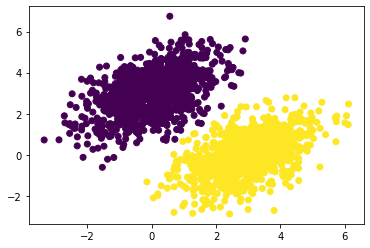

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

(´･ω･`) 分開了?

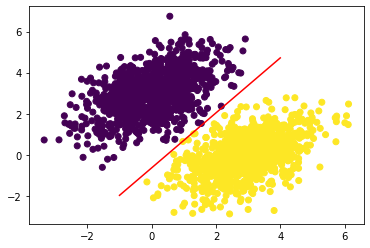

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

┗|｀O′|┛

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 11.2874 - binary_accuracy: 0.9970
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 10.8917 - binary_accuracy: 0.9970
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 10.5572 - binary_accuracy: 0.9970
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 10.2345 - binary_accuracy: 0.9970
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 9.9219 - binary_accuracy: 0.9970


In [ ]:
history.history

{'loss': [11.287431716918945,
  10.891681671142578,
  10.55721664428711,
  10.23453140258789,
  9.92186164855957],
 'binary_accuracy': [0.996999979019165,
  0.996999979019165,
  0.996999979019165,
  0.996999979019165,
  0.996999979019165]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 6ms/step - loss: 0.2449 - binary_accuracy: 0.9579 - val_loss: 0.0308 - val_binary_accuracy: 0.9950
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0706 - binary_accuracy: 0.9614 - val_loss: 0.0307 - val_binary_accuracy: 0.9933
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0706 - binary_accuracy: 0.9600 - val_loss: 0.0377 - val_binary_accuracy: 0.9933
Epoch 4/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0735 - binary_accuracy: 0.9586 - val_loss: 0.0811 - val_binary_accuracy: 0.9750
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0707 - binary_accuracy: 0.9586 - val_loss: 0.1145 - val_binary_accuracy: 0.9817


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.0573346 ]
 [ 0.80567956]
 [-0.614725  ]
 [ 0.94929063]
 [-0.239149  ]
 [ 0.2160391 ]
 [ 1.0730915 ]
 [-0.5302316 ]
 [ 0.8348721 ]
 [-0.4090955 ]]
